# Prometne nesreče v Sloveniji #

## Uvod
Za seminarsko nalogo bom analiziral podatke o prometnih nesrečah v Sloveniji za leti 2019 in 2020. Podatke sem pridobil
iz spletne strani policija.si (https://www.policija.si/o-slovenski-policiji/statistika/prometna-varnost). Isti podatki so tudi dostopni
na spletni strani podatki.gov.si (https://podatki.gov.si/dataset/mnzpprometne-nesrece-od-leta-2009-dalje), vendar manjkajo podatki za leto 2020.


## Cilji
  * Analiza in vizualizacija podatkov.
  * Odgovoriti na vnaprej postavljena vprašanja in na morebitna vprašanja, ki se pojavijo ob reševanju problema.
  * Napovedovanje vrednosti alkohola v krvi na podlagi okoliščin nesreče.
  
  
  ### Vprašanja
  * Kateri vozniki povzročajo največ nesreč?
  * Kakšne okoliščine povzročajo največ nesreč?
  * Ali količina alkohola v krvi voznika, vpliva na težavnost poškodbe?
  

## Branje podatkov ##

In [20]:
#knjužnice

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
data20 = pd.read_csv("Data/pn2020.csv", ";", encoding="cp1252")
data19 = pd.read_csv("Data/pn2019.csv", ";", encoding="cp1252")

In [13]:
data20

,ZaporednaStevilkaPN,KlasifikacijaNesrece,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,...,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VozniskiStazVLetih,VozniskiStazVMesecih,VrednostAlkotesta,VrednostStrokovnegaPregleda
0,1,Z MATERIALNO ŠKODO,NOVA GORICA,20.02.2020,20.15,DA,NASELJE,NASELJE Z ULIÈNIM SISTEMOM,37075,NOVA GORICA,...,ŽENSKI,NOVA GORICA,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,NEZNANO,8,5,",00",",00"
1,2,Z LAŽJO TELESNO POŠKODBO,SLOVENJ GRADEC,02.01.2020,12.45,NE,CESTA,REGIONALNA CESTA III. REDA,00701,RUTA-PESEK-ROGLA-ZEÈE,...,MOŠKI,LENART,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,12,9,",00",",00"
2,2,Z LAŽJO TELESNO POŠKODBO,SLOVENJ GRADEC,02.01.2020,12.45,NE,CESTA,REGIONALNA CESTA III. REDA,00701,RUTA-PESEK-ROGLA-ZEÈE,...,MOŠKI,SLOVENSKA BISTRICA,SLOVENIJA,LAŽJA TELESNA POŠKODBA,PEŠEC,NEZNANO,0,0,",00",",00"
3,3,Z MATERIALNO ŠKODO,ŽALEC,01.01.2020,1.17,NE,CESTA,REGIONALNA CESTA,00225,MENGEŠ-DUPLICA-ŠENTRUPERT,...,MOŠKI,MOZIRJE,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,16,10,",00",",00"
4,3,Z MATERIALNO ŠKODO,ŽALEC,01.01.2020,1.17,NE,CESTA,REGIONALNA CESTA,00225,MENGEŠ-DUPLICA-ŠENTRUPERT,...,MOŠKI,MOZIRJE,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,54,11,",00",",00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26068,14969,Z MATERIALNO ŠKODO,ŠMARJE PRI JELŠAH,31.12.2020,15.30,NE,CESTA,LOKALNA CESTA,97474,318020 TREBÈE-KR.VRH-JURÈ,...,ŽENSKI,ŠMARJE PRI JELŠAH,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,NEZNANO,37,9,",00",",00"
26069,14969,Z MATERIALNO ŠKODO,ŠMARJE PRI JELŠAH,31.12.2020,15.30,NE,CESTA,LOKALNA CESTA,97474,318020 TREBÈE-KR.VRH-JURÈ,...,ŽENSKI,ŠMARJE PRI JELŠAH,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,NEZNANO,14,10,",00",",00"
26070,14970,S HUDO TELESNO POŠKODBO,CELJE,24.12.2020,10.30,DA,NASELJE,NASELJE Z ULIÈNIM SISTEMOM,03011,CELJE,...,MOŠKI,CELJE,SLOVENIJA,HUDA TELESNA POŠKODBA,KOLESAR,NE,0,0,",00",",00"
26071,14971,Z MATERIALNO ŠKODO,IZOLA,30.12.2020,2.00,DA,NASELJE,NASELJE BREZ ULIÈNEGA SISTEMA,13009,ŠARED,...,MOŠKI,KOPER,SLOVENIJA,BREZ POŠKODBE,VOZNIK TOVORNEGA VOZILA,DA,0,0,",00",",00"


## Priprava podatkov ##

## Analiza ##

In [23]:
data19["DatumPN"][0]

'08.01.2019'

In [30]:
#datetime.strptime(data19["DatumPN"][0], "%d.%m.%Y")

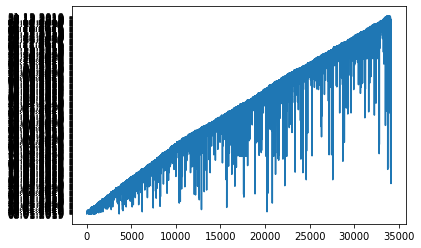

In [32]:
#plt.plot(data19["DatumPN"])